In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#import frequency and lumped port volatge from text files and loads into df
#assumes measured at same frequencies 
Filename = "absLPV_biconAndDipole_12.26.21.txt"

df30cmDip_606057_0dBm = pd.DataFrame()
df30cmDip_606057_0dBm['Frequency'] = np.loadtxt(Filename, skiprows = 5, usecols = 0)
df30cmDip_606057_0dBm['LPV'] = np.loadtxt(Filename, skiprows = 5, usecols = 1)

Filename = "absEx_52CutPoints_biconAndDipole_12.26.21.txt"

pointArr = np.loadtxt(Filename, usecols=range(1,53), skiprows=4, max_rows = 1, delimiter = 'abs(emw.Ex) (V/m), Point: ', dtype = 'str')
for i, point in enumerate(pointArr):
    df30cmDip_606057_0dBm[point] = np.loadtxt(Filename, skiprows=5, usecols=i+1)

In [5]:
#compute data frame 

df30cmDip_606057_0dBm['Average Ex'] = df30cmDip_606057_0dBm.iloc[:,2:].mean(axis = 1)

df30cmDip_606057_0dBm['AF'] = 20 * np.log10(df30cmDip_606057_0dBm['Average Ex']/df30cmDip_606057_0dBm['LPV']) + 5.6 
df30cmDip_606057_0dBm['AF no avg'] = 20 * np.log10(df30cmDip_606057_0dBm['(-0.5, 0, 0.4)          ']/df30cmDip_606057_0dBm['LPV']) + 5.6 
df30cmDip_606057_0dBm['AF no avg2'] = 20 * np.log10(df30cmDip_606057_0dBm['(-0.1, 0, 0.4)          ']/df30cmDip_606057_0dBm['LPV']) + 5.6 

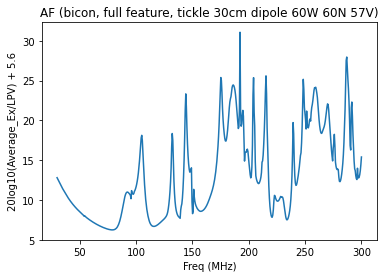

In [10]:
%matplotlib inline 
plt.figure()
plt.title('AF (bicon, full feature, tickle 30cm dipole 60W 60N 57V)')
plt.xlabel('Freq (MHz)')
plt.ylabel('20log10(Average_Ex/LPV) + 5.6' )
plt.plot(df30cmDip_606057_0dBm['Frequency'], df30cmDip_606057_0dBm['AF'])